In [39]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df1=pd.read_csv('cotton_datetime.csv.csv')

In [41]:
df1.columns = ['year','cotton_production']

In [79]:
df1

,cotton_production
year,
1966-01-01,8.60
1967-01-01,12.10
1968-01-01,5.50
1969-01-01,7.80
1970-01-01,8.30
1971-01-01,10.90
1972-01-01,8.40
1973-01-01,10.40
1974-01-01,13.50


In [43]:
df1.dtypes

year                  object
cotton_production    float64
dtype: object

In [44]:
df1['year'] = pd.to_datetime(df1['year'])

In [45]:
df1.dtypes

year                 datetime64[ns]
cotton_production           float64
dtype: object

In [46]:
df1.set_index('year',inplace=True)

In [47]:
df1.head()


,cotton_production
year,
1966-01-01,8.6
1967-01-01,12.1
1968-01-01,5.5
1969-01-01,7.8
1970-01-01,8.3


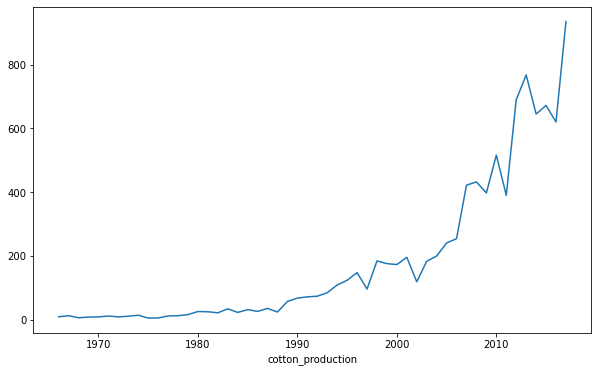

In [48]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.xlabel('year')
plt.xlabel('cotton_production')
plt.plot(df1)

In [49]:
rolmean = df1.rolling(window=12).mean()
rolstd = df1.rolling(window=12).std()
print(rolmean,rolstd)

            cotton_production
year                         
1966-01-01                NaN
1967-01-01                NaN
1968-01-01                NaN
1969-01-01                NaN
1970-01-01                NaN
1971-01-01                NaN
1972-01-01                NaN
1973-01-01                NaN
1974-01-01                NaN
1975-01-01                NaN
1976-01-01                NaN
1977-01-01           8.858333
1978-01-01           9.133333
1979-01-01           9.416667
1980-01-01          11.050000
1981-01-01          12.433333
1982-01-01          13.500000
1983-01-01          15.391667
1984-01-01          16.558333
1985-01-01          18.283333
1986-01-01          19.291667
1987-01-01          21.816667
1988-01-01          23.375000
1989-01-01          27.175000
1990-01-01          31.785000
1991-01-01          36.418333
1992-01-01          40.425833
1993-01-01          45.405000
1994-01-01          52.685000
1995-01-01          60.155833
1996-01-01          70.557500
1997-01-01

Text(0.5, 1.0, 'rolling mean and std')

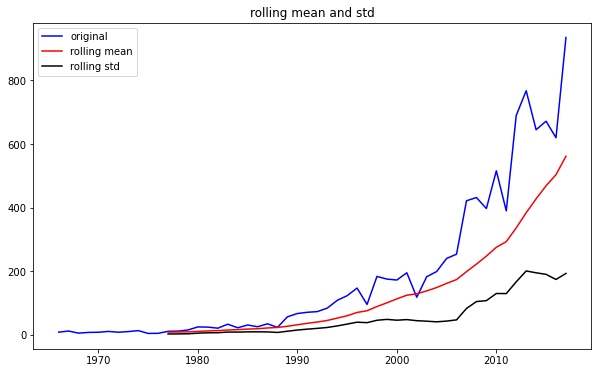

In [50]:
orig = plt.plot(df1,color="blue",label='original')
mean = plt.plot(rolmean,color='red',label='rolling mean')
std = plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')
plt.title('rolling mean and std')

In [51]:
from statsmodels.tsa.stattools import adfuller
print('dickey fuller test:')
dftest = adfuller(df1['cotton_production'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Stistic','p value','#Lags used','Number of Observations used'])
for key, value in dftest[4].items():
    dfoutput['Criticl Value (%s)'%key] = value
    
print(dfoutput)

dickey fuller test:
Test Stistic                    5.029693
p value                         1.000000
#Lags used                     11.000000
Number of Observations used    40.000000
Criticl Value (1%)             -3.605565
Criticl Value (5%)             -2.937069
Criticl Value (10%)            -2.606986
dtype: float64


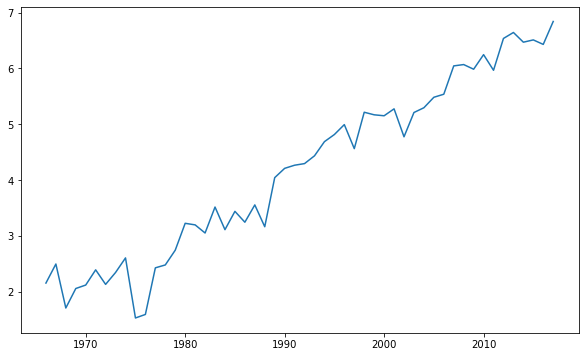

In [52]:
df_logscale = np.log(df1)
plt.plot(df_logscale)

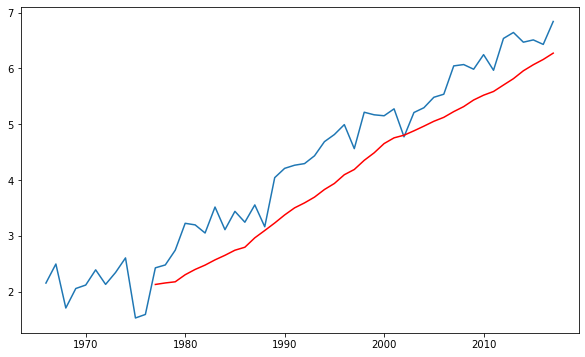

In [53]:
movingaverage = df_logscale.rolling(window=12).mean()
movingstd = df_logscale.rolling(window=12).std()
plt.plot(df_logscale)
plt.plot(movingaverage,color='red')

In [54]:
dflogscale_minusmivingaverage = df_logscale - movingaverage
dflogscale_minusmivingaverage.head(12)

dflogscale_minusmivingaverage.dropna(inplace=True)
dflogscale_minusmivingaverage.head(10)

,cotton_production
year,
1977-01-01,0.297996
1978-01-01,0.322667
1979-01-01,0.566333
1980-01-01,0.921850
1981-01-01,0.798527
1982-01-01,0.575466
1983-01-01,0.946905
1984-01-01,0.459704
1985-01-01,0.696568


In [55]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingaverage = timeseries.rolling(window=12).mean()
    movingstd = timeseries.rolling(window=12).std()
    orig = plt.plot(timeseries,color='blue',label='original')
    mean = plt.plot(movingaverage,color='red',label='rolling mean')
    std = plt.plot(movingstd,color='black',label='rolling std')
    plt.legend(loc='best')
    plt.title('rolling mean & std')
    
    print('results of dickey fuller test:')
    dftest  =adfuller(timeseries['cotton_production'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p value','#Lags Used','Number of Observatios Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)

results of dickey fuller test:
Test Statistic                -4.959997
p value                        0.000027
#Lags Used                     0.000000
Number of Observatios Used    40.000000
Critical value (1%)           -3.605565
Critical value (5%)           -2.937069
Critical value (10%)          -2.606986
dtype: float64


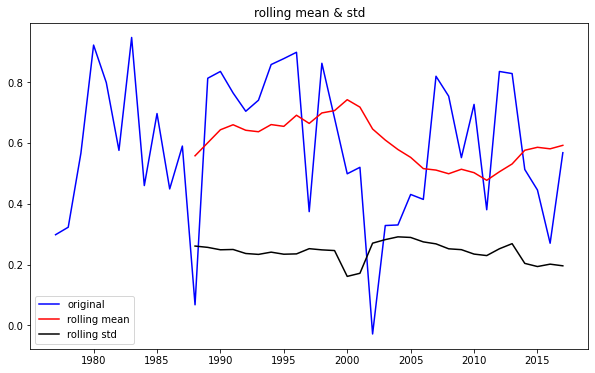

In [56]:
test_stationarity(dflogscale_minusmivingaverage)

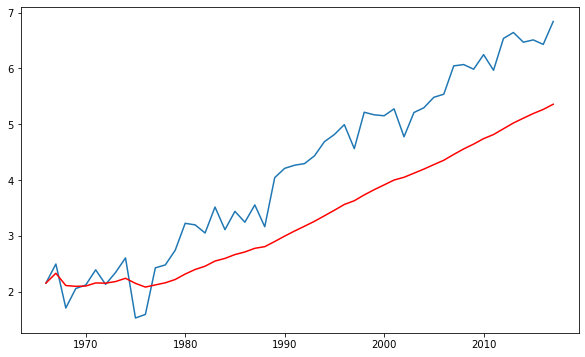

In [57]:
exponentialweighteddecayaverage = df_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(df_logscale)
plt.plot(exponentialweighteddecayaverage,color='red')

results of dickey fuller test:
Test Statistic                -1.228648
p value                        0.661152
#Lags Used                     8.000000
Number of Observatios Used    43.000000
Critical value (1%)           -3.592504
Critical value (5%)           -2.931550
Critical value (10%)          -2.604066
dtype: float64


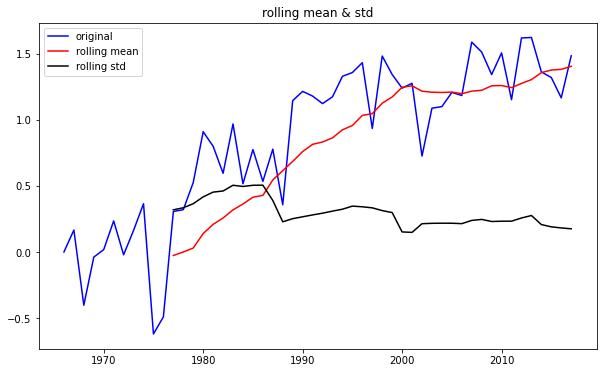

In [58]:
datalogscaleminusmovingexponentialdecayaverage = df_logscale - exponentialweighteddecayaverage
test_stationarity(datalogscaleminusmovingexponentialdecayaverage)

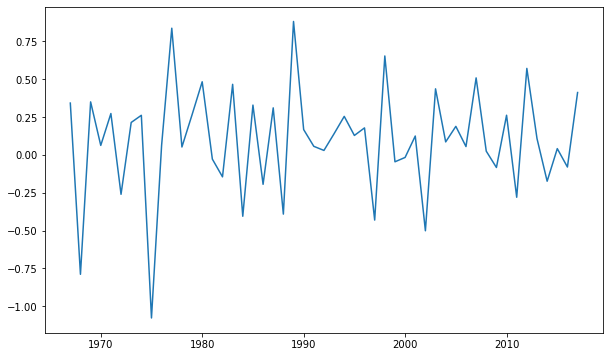

In [59]:
dflogdiffshifting = df_logscale - df_logscale.shift()
plt.plot(dflogdiffshifting)

results of dickey fuller test:
Test Statistic                -3.198097
p value                        0.020095
#Lags Used                     7.000000
Number of Observatios Used    43.000000
Critical value (1%)           -3.592504
Critical value (5%)           -2.931550
Critical value (10%)          -2.604066
dtype: float64


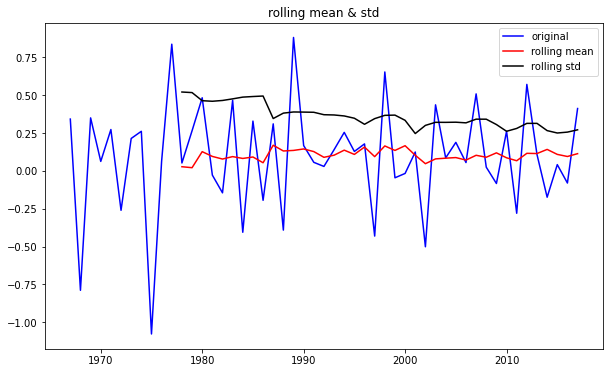

In [60]:
dflogdiffshifting.dropna(inplace=True)
test_stationarity(dflogdiffshifting)

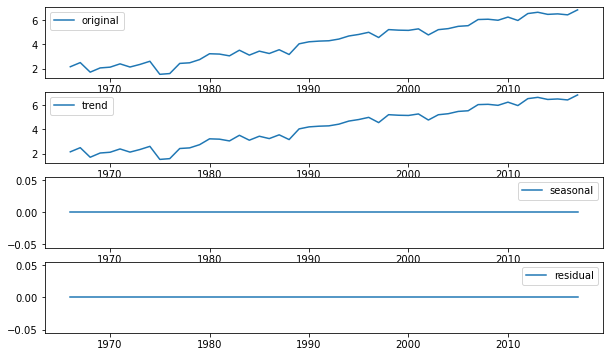

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_logscale,label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


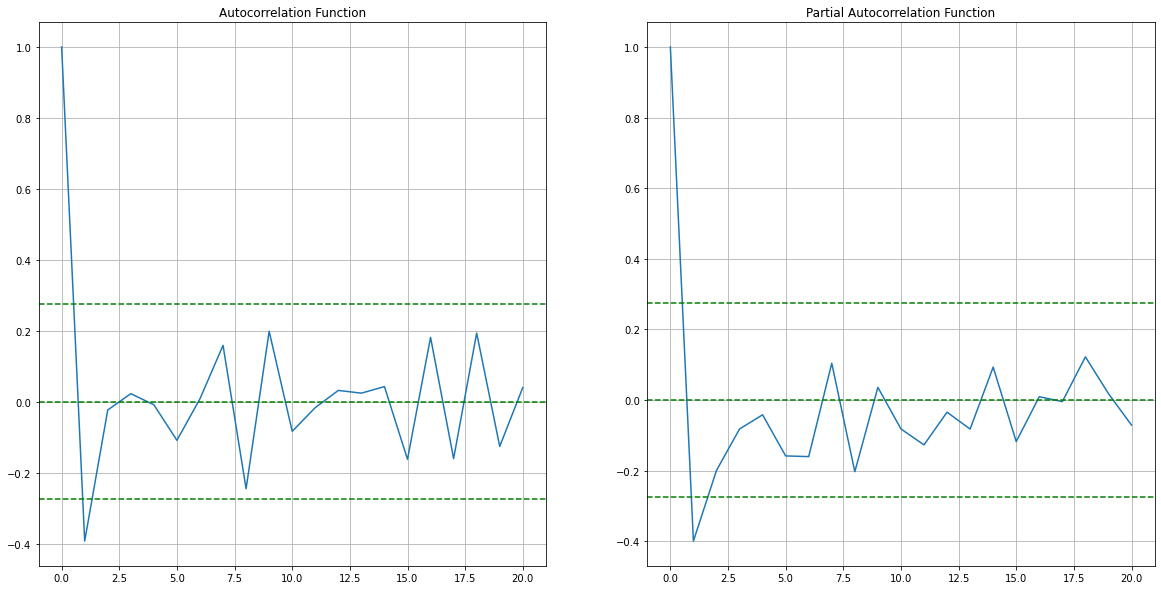

In [62]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(dflogdiffshifting, nlags=20)
lag_pacf=pacf(dflogdiffshifting, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.title('Autocorrelation Function')
plt.grid()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')
plt.grid()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN 

plotting AR MODEL


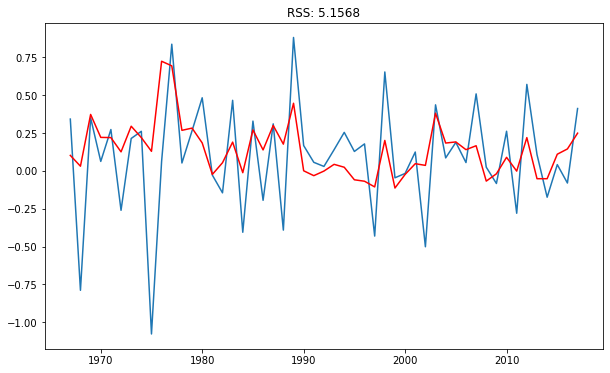

In [63]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_logscale,order=(1,1,1))
results_AR = model.fit(disp=-1)
plt.plot(dflogdiffshifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-dflogdiffshifting['cotton_production'])**2))
print('plotting AR MODEL')

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


plotting AR MODEL


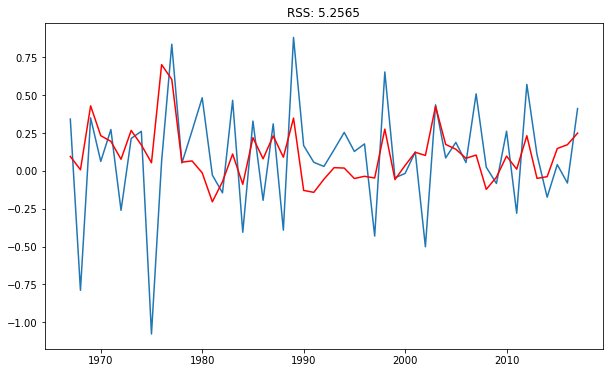

In [64]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_logscale,order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(dflogdiffshifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues-dflogdiffshifting['cotton_production'])**2))
print('plotting AR MODEL')

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import

plotting AR MODEL


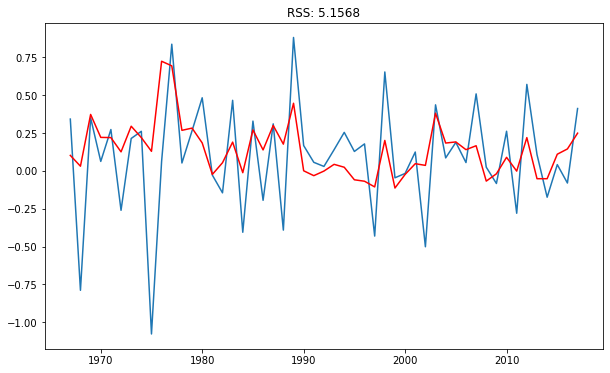

In [65]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_logscale,order=(1,1,1))
results_ARIMA = model.fit(disp=-1)
plt.plot(dflogdiffshifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues-dflogdiffshifting['cotton_production'])**2))
print('plotting AR MODEL')

In [66]:
predictions_arima_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
predictions_arima_diff.head()

year
1967-01-01    0.101778
1968-01-01    0.030546
1969-01-01    0.372077
1970-01-01    0.220667
1971-01-01    0.219325
dtype: float64

In [67]:
predictions_arima_diff_cumsum = predictions_arima_diff.cumsum()
predictions_arima_diff_cumsum.head()

year
1967-01-01    0.101778
1968-01-01    0.132324
1969-01-01    0.504401
1970-01-01    0.725068
1971-01-01    0.944392
dtype: float64

In [68]:
predictions_arima_log = pd.Series(df_logscale.iloc[:, 0],index=df_logscale.index)
predictions_arima_log = predictions_arima_log.add(predictions_arima_diff_cumsum,fill_value = 0)
predictions_arima_log.head()

year
1966-01-01    2.151762
1967-01-01    2.594983
1968-01-01    1.837072
1969-01-01    2.558525
1970-01-01    2.841323
dtype: float64

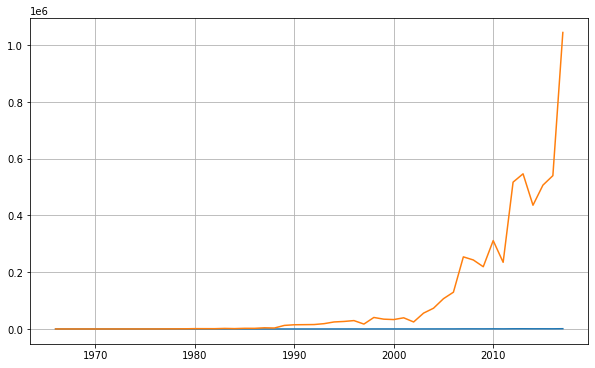

In [69]:
predictions_arima = np.exp(predictions_arima_log)
plt.plot(df1)
plt.plot(predictions_arima)
plt.grid()

In [70]:
df_logscale

,cotton_production
year,
1966-01-01,2.151762
1967-01-01,2.493205
1968-01-01,1.704748
1969-01-01,2.054124
1970-01-01,2.116256
1971-01-01,2.388763
1972-01-01,2.128232
1973-01-01,2.341806
1974-01-01,2.602690


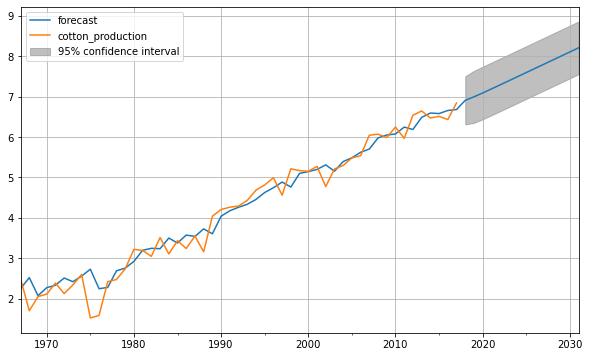

In [78]:
results_ARIMA.plot_predict(1,65)
plt.grid()

In [72]:
x = results_ARIMA.forecast(steps=120)

In [73]:
def iterative_ARIMA_fit(series):

    ARIMA_fit_results = {}
    for AR in ARrange:
        for MA in MArange :
            for Diff in Diffrange:
                model = ARIMA(series, order = (AR,Diff,MA))
                fit_is_available = False
                results_ARIMA = None
                try:
                    results_ARIMA = model.fit(disp = -1, method = 'css')
                    fit_is_available = True
                except:
                    continue
                if fit_is_available:
                    safe_RSS = get_safe_RSS(series, results_ARIMA.fittedvalues)
                    ARIMA_fit_results['%d-%d-%d' % (AR,Diff,MA)]=[safe_RSS,results_ARIMA]

    return ARIMA_fit_results

In [74]:
def get_best_ARIMA_model_fit(series):

    if t.isstationary(series)[0]:
        ARIMA_fit_results = iterative_ARIMA_fit(series)
        best_ARIMA = min(ARIMA_fit_results, key = ARIMA_fit_results.get)
        
        return ARIMA_fit_results[best_ARIMA]

In [75]:
def get_safe_RSS(series, fitted_values):
    fitted_values_copy = fitted_values  # original fit is left untouched
    missing_index = list(set(series.index).difference(set(fitted_values_copy.index)))
    if missing_index:
        nan_series = pd.Series(index = pd.to_datetime(missing_index))
        fitted_values_copy = fitted_values_copy.append(nan_series)
        fitted_values_copy.sort_index(inplace = True)
        fitted_values_copy.fillna(method = 'bfill', inplace = True)  # fill holes
        fitted_values_copy.fillna(method = 'ffill', inplace = True)
    return sum((fitted_values_copy - series)**2)

In [76]:
df1.size

52